In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [34]:
data = pd.read_csv(r"C:\Users\lahat\Documents\M2IMSD\Formation_ML_Udemy\ACP\cancer_du_sein-wisconsin.csv") 

In [35]:
data.head()

,identification,Épaisseur,Uniformité_taille_cellules,Uniformité_forme_cellules,Adhérence_marginale,Taille_cellules_épithéliale,Nue_Nuclei,Bland_Chromatin,Nucleoli_Normal,Mitoses,Classe
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [36]:
X = data.iloc[:,-10:-1].values

In [37]:
target = data['Classe'].values

In [38]:
# gestion des  valeurs nulls
data.isnull().any()

identification                 False
Épaisseur                      False
Uniformité_taille_cellules     False
Uniformité_forme_cellules      False
Adhérence_marginale            False
Taille_cellules_épithéliale    False
Nue_Nuclei                      True
Bland_Chromatin                False
Nucleoli_Normal                False
Mitoses                        False
Classe                         False
dtype: bool

In [39]:
imptr = SimpleImputer(missing_values=np.nan, strategy='mean')
imptr=imptr.fit(X[:,5:6])
# Imputez toutes les valeurs manquantes dans X
X[:,5:6]=imptr.transform(X[:,5:6])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 42, stratify = target)

In [41]:
X_train

array([[ 1.,  1.,  1., ...,  2.,  1.,  1.],
       [ 6., 10., 10., ...,  8., 10., 10.],
       [ 3.,  2.,  2., ...,  1.,  1.,  1.],
       ...,
       [ 7.,  6.,  3., ...,  7.,  4.,  6.],
       [ 5.,  1.,  1., ...,  2.,  1.,  1.],
       [ 4.,  4.,  2., ...,  2.,  1.,  2.]])

In [42]:
X_test

array([[ 4.,  1.,  1., ...,  3.,  1.,  1.],
       [ 1.,  1.,  1., ...,  2.,  1.,  1.],
       [ 2.,  1.,  1., ...,  2.,  1.,  1.],
       ...,
       [ 2.,  7., 10., ...,  4.,  9.,  4.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 6.,  1.,  1., ...,  3.,  1.,  1.]])

# APPLICATION DU PCA

In [12]:
pca = PCA(n_components = 2)

In [ ]:
# applique la pca aux données d'entrainement et de test

In [43]:
X_train = pca.fit_transform(X_train)

In [44]:
X_test = pca.transform(X_test)

In [30]:
variance_explique = pca.explained_variance_ratio_
variance_explique

array([0.68478624, 0.07405559])

# Initialisation du classifieur kNN avec 3 voisins

In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [19]:
# Adapter le classifieur aux données d'apprentissage
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
y_pred = knn_classifier.predict(X_test)

In [21]:
# Extraire le score de précision des ensembles de test
knn_classifier.score(X_test, y_test)

0.9619047619047619

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[132,   6],
       [  2,  70]], dtype=int64)

In [24]:
def affichage_region_dec(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # trace la surface de décision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='legend')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
C:\Users\lahat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


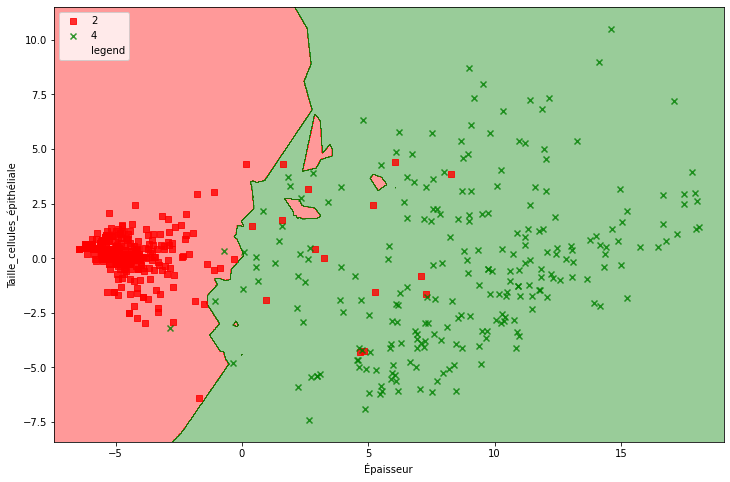

In [26]:
X_combine = np.vstack((X_train, X_test))
#Empilez les tableaux en séquence verticalement 
y_combine = np.hstack((y_train, y_test))
#Empilez les tableaux en séquence horizontalement
plt.figure(figsize=(12,8))
affichage_region_dec(X_combine,
                      y_combine, classifier=knn_classifier,
                      test_idx=range(105,150))
   
plt.xlabel('Épaisseur')
plt.ylabel('Taille_cellules_épithéliale')
plt.legend(loc='upper left')
plt.show()  